In [116]:
# Importação do csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
# import umap

df = pd.read_csv('./data/covid_cities_features.csv')

# Tratamento inicial

In [117]:
df.head()

,city,state,total_cases,mean_cases,std_cases,total_deaths,mean_deaths,std_deaths,days_recorded,death_rate,mean_daily_growth,days_until_first_case
0,Abadia de Goiás,GO,1351.0,558.153664,426.181817,28,7.565012,7.530658,423,0.020725,3.193853,55
1,Abadia dos Dourados,MG,375.0,118.761229,119.465862,14,2.687943,4.138253,423,0.037333,0.886525,42
2,Abadiânia,GO,400.0,147.659574,105.898626,27,10.801418,8.029761,423,0.067500,0.945626,63
3,Abaetetuba,PA,7659.0,3646.444444,2098.725146,210,104.628842,48.581654,423,0.027419,18.106383,4
4,Abaeté,MG,1019.0,248.574468,312.806079,26,5.224586,6.855251,423,0.025515,2.408983,16


In [118]:
# Removendo cidade
df.drop('city', axis=1, inplace=True)

In [119]:
# Agrupando `state` por regiões
map_regions = {
  'North': ['AM', 'PA', 'AP', 'RO', 'RR', 'AC', 'TO'],
  'Northeast': ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA'],
  'Central-West': ['MT', 'MS', 'GO', 'DF'],
  'Southeast': ['SP', 'RJ', 'ES', 'MG'],
  'South': ['PR', 'RS', 'SC']
}

state_to_region = {state: region for region, states in map_regions.items() for state in states}

regions = df['state'].map(state_to_region)
df.insert(0, 'region', regions)

In [120]:
# Dropando coluna `state`
df.drop('state', axis=1, inplace=True)

In [121]:
# Aplicando one-hot encode no campo `state` para transformar em `region`
df = pd.get_dummies(df, columns=['region'])
hot_encode_names = {
  'region_North': 'North',
  'region_Northeast': 'Northeast',
  'region_Central-West': 'Central-West',
  'region_Southeast': 'Southeast',
  'region_South': 'South',
}

df = df.rename(columns=hot_encode_names)

In [122]:
# Normalização
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Redução de dimensionalidade

In [123]:
# PCA
# Plotando PCA para visualização

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

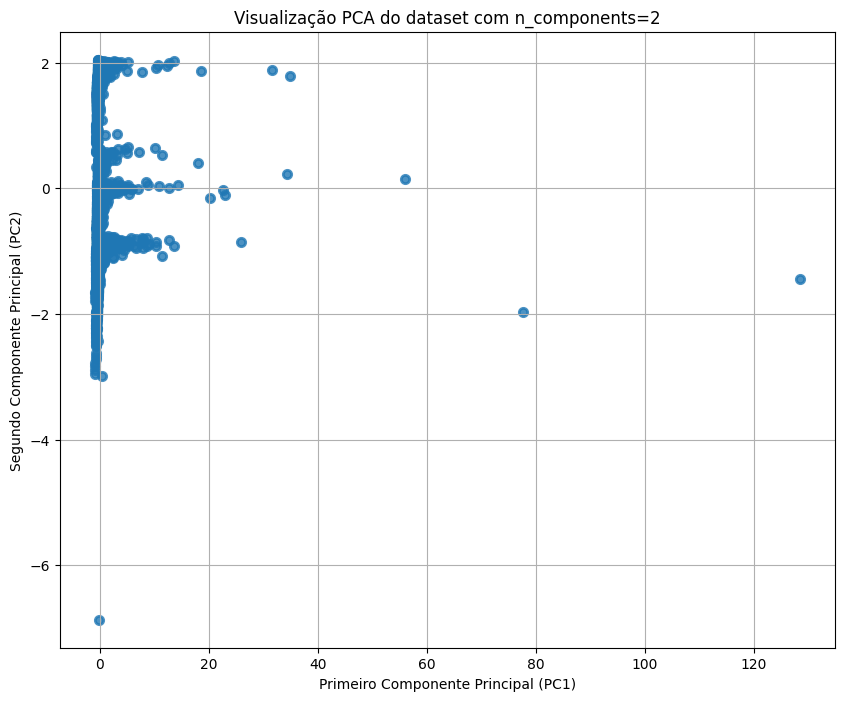

In [124]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=.8, lw=2)
plt.title('Visualização PCA do dataset com n_components=2')
plt.xlabel('Primeiro Componente Principal (PC1)')
plt.ylabel('Segundo Componente Principal (PC2)')
plt.grid(True)
plt.show()

In [125]:
# t-SNE


In [126]:
def plot_tsne(df_tsne, perp):
  plt.figure(figsize=(10, 8))
  plt.scatter(df_tsne[:, 0], df_tsne[:, 1], alpha=.8, lw=0)
  plt.title(f'Visualização t-SNE do dataset com n_components=2 e perplexity={perp}')
  plt.xlabel('Componente t-SNE 1')
  plt.ylabel('Componente t-SNE 2')
  plt.grid(True)
  plt.show()

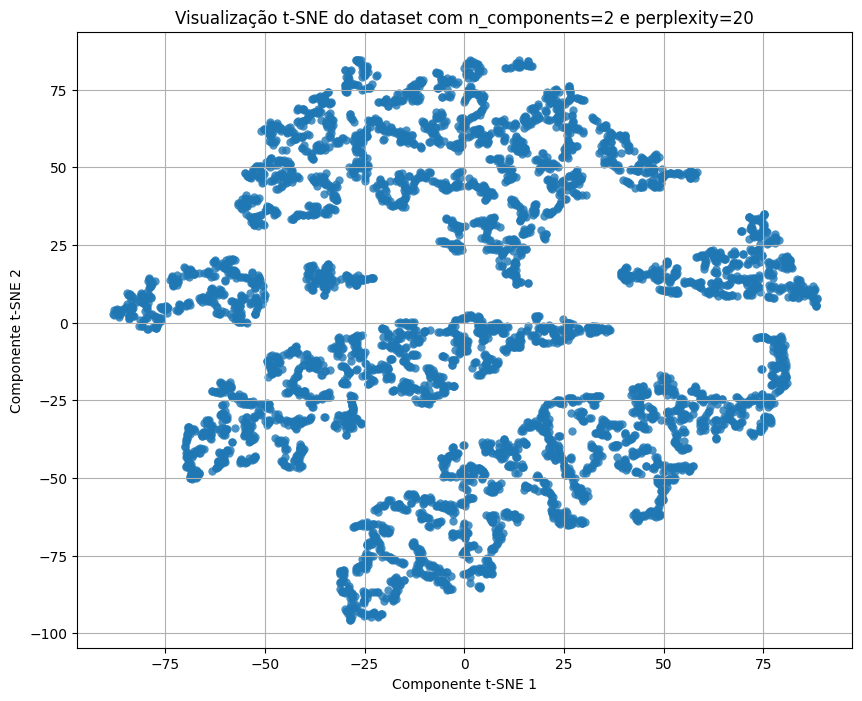

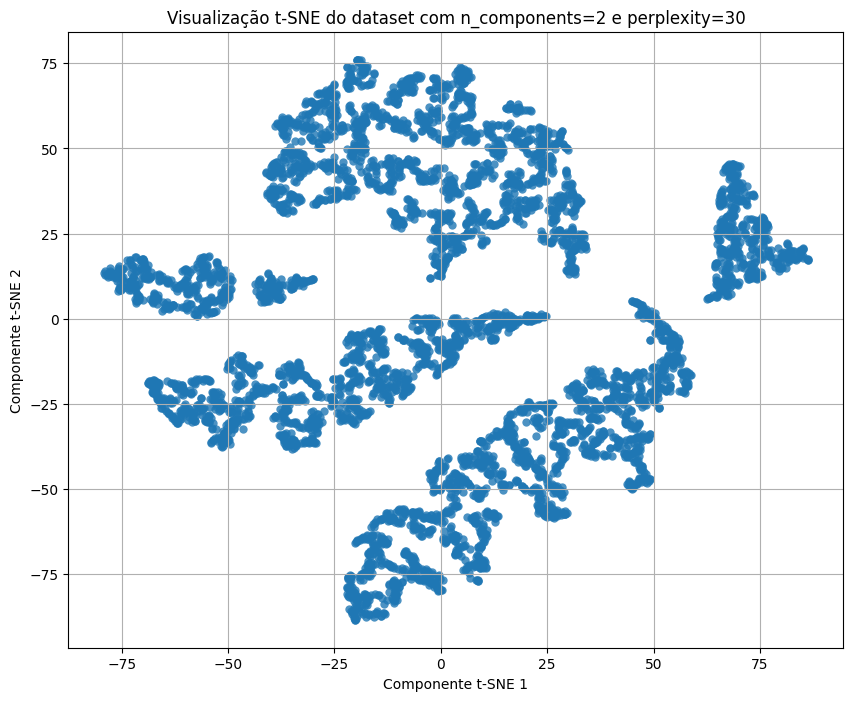

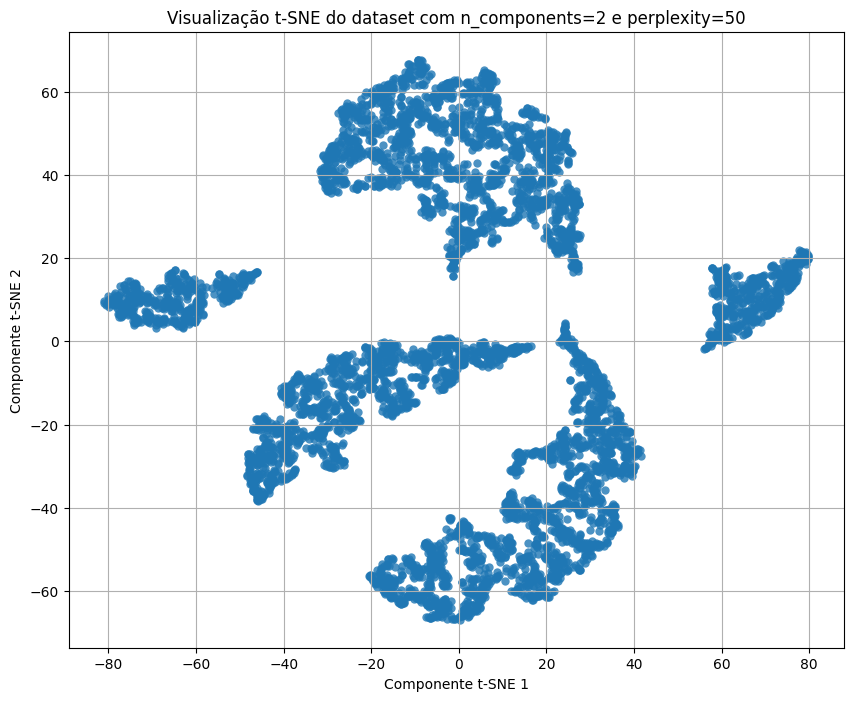

In [127]:
for perp in [20, 30, 50]:
  tsne = TSNE(n_components=2, perplexity=perp, max_iter=1000, learning_rate=200)
  df_tsne = tsne.fit_transform(df_scaled)
  plot_tsne(df_tsne, perp)